In [81]:
# Basic data handling and mathematical operations
import math
import numpy as np
import pandas as pd
from scipy import stats

# Statistical modeling and evaluation
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.tools import add_constant

# Machine learning
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Geospatial data processing
import geopandas as gpd
from pyproj import Transformer
from shapely.geometry import Point
from math import sqrt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance
from rfpimp import importances, plot_importances

# Ignore warning
import warnings
warnings.filterwarnings("ignore")  

# Auxiliary tools
from io import BytesIO
import requests

# OSM
import osmnx as ox

In [82]:
import geopandas as gpd


In [83]:
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame

import contextily as ctx

# 1 Import

## 1.0 LSOA

In [84]:
# Read geodataset from a local "data" folder
gis_path = "../statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp"
gdf_LSOA = gpd.read_file(gis_path)

# area km2
gdf_LSOA['area'] = gdf_LSOA['geometry'].area 

gdf_LSOA

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,area
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181...",1.333208e+05
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",2.261913e+05
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182...",5.730297e+04
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180...",1.907388e+05
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",1.441958e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.68 179824.674, 544766.313 179...",1.233092e+05
4831,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",1.004853e+06
4832,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.63 179...",1.522620e+05
4833,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.27, 546320.715 180...",5.584777e+05


## 1.1 dft-road-casualty-statistics-collision-last-5-years （2018-2022）
link: https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

In [85]:
collision = 'dft-road-casualty-statistics-collision-last-5-years.csv'

df_collision = pd.read_csv(collision)
df_collision['accident_index'] = df_collision['accident_index'].astype(str)
df_collision

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2018010080971,2018,10080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000854
1,2018010080973,2018,10080973,542020.0,184290.0,0.046471,51.539651,1,3,1,...,0,4,1,1,0,0,1,1,2,E01003531
2,2018010080974,2018,10080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,...,5,4,1,1,0,0,1,1,2,E01002723
3,2018010080981,2018,10080981,541450.0,183220.0,0.037828,51.530179,1,2,2,...,5,4,2,2,0,0,1,1,2,E01003492
4,2018010080982,2018,10080982,543580.0,176500.0,0.065781,51.469258,1,2,2,...,0,4,1,2,0,0,1,1,2,E01001682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538456,2022991311627,2022,991311627,235016.0,625551.0,-4.613246,55.495815,99,2,1,...,1,1,1,1,0,0,1,2,-1,-1
538457,2022991312498,2022,991312498,127459.0,663067.0,-6.348650,55.783849,99,2,3,...,0,6,1,1,0,0,2,1,-1,-1
538458,2022991315177,2022,991315177,254396.0,663549.0,-4.326930,55.843114,99,3,1,...,5,1,1,1,0,0,1,2,-1,-1
538459,2022991321308,2022,991321308,325409.0,677054.0,-3.196963,55.980648,99,2,1,...,8,4,1,1,0,0,1,1,-1,-1


In [86]:
# include all UK data, only select london LSOA
london_lsoa_codes = gdf_LSOA['LSOA11CD'].tolist()
df_collision = df_collision[df_collision['lsoa_of_accident_location'].isin(london_lsoa_codes)]

df_collision.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118645 entries, 0 to 522105
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               118645 non-null  object 
 1   accident_year                                118645 non-null  int64  
 2   accident_reference                           118645 non-null  object 
 3   location_easting_osgr                        118645 non-null  float64
 4   location_northing_osgr                       118645 non-null  float64
 5   longitude                                    118645 non-null  float64
 6   latitude                                     118645 non-null  float64
 7   police_force                                 118645 non-null  int64  
 8   accident_severity                            118645 non-null  int64  
 9   number_of_vehicles                           118645 non-null  in

In [87]:
# -1 represents null in the df
df_collision.replace(-1, np.nan, inplace=True)

### Choose relavant values and merge features

In [88]:
df_collision.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [89]:
df_collision_select=df_collision[["accident_index","location_easting_osgr","location_northing_osgr",
                                  "longitude","latitude","lsoa_of_accident_location","accident_severity",
                                  "number_of_vehicles","day_of_week","first_road_class","speed_limit","road_type",
                                  "pedestrian_crossing_physical_facilities","light_conditions",
                                  "weather_conditions","urban_or_rural_area","junction_detail"]]

In [90]:
df_collision_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118645 entries, 0 to 522105
Data columns (total 17 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   accident_index                           118645 non-null  object 
 1   location_easting_osgr                    118645 non-null  float64
 2   location_northing_osgr                   118645 non-null  float64
 3   longitude                                118645 non-null  float64
 4   latitude                                 118645 non-null  float64
 5   lsoa_of_accident_location                118645 non-null  object 
 6   accident_severity                        118645 non-null  int64  
 7   number_of_vehicles                       118645 non-null  int64  
 8   day_of_week                              118645 non-null  int64  
 9   first_road_class                         118645 non-null  int64  
 10  speed_limit                          

In [91]:
# road_type
# road_type	1	Roundabout
# road_type	2	One way street
# road_type	3	Dual carriageway
# road_type	6	Single carriageway
# road_type	7	Slip road
# road_type	9	Unknown
# road_type	12	One way street/Slip road
# road_type	-1	Data missing or out of range
# speed_limit		
# speed_limit	-1	Data missing or out of range
# speed_limit	99	unknown (self reported)

road_type_mapping = {
    1: 'Other',
    2: 'Single',
    3: 'Dual',
    6: 'Single',
    7: 'Other',
    9: 'Other',
    12: 'Single',
    99: 'Other'
}

# Apply the mapping to the 'first_road_class' column
df_collision_select['road_type'] = df_collision_select['road_type'].map(road_type_mapping)

In [92]:
# # accident_severity
# 1	Fatal
# 2	Serious
# 3	Slight
accident_severity_mapping = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}

# Apply the mapping to the 'first_road_class' column
df_collision_select['accident_severity'] = df_collision_select['accident_severity'].map(accident_severity_mapping)

In [93]:
# day of a week
df_collision_select['day_of_week'] = df_collision_select['day_of_week'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')

In [94]:
# road class
# Define a mapping from numbers to road classes
road_class_mapping = {
    1: 'Motorway',
    2: 'A_Road',
    3: 'A_Road',
    4: 'B_Road',
    5: 'C_Road',
    6: 'Unclassified'
}

# Apply the mapping to the 'first_road_class' column
df_collision_select['first_road_class'] = df_collision_select['first_road_class'].map(road_class_mapping)

In [95]:
# speed_limit
# 20,30,40,50,60,70
df_collision_select['speed_limit'].unique()

array([30., 20., 40., 50., 70., 60., nan])

In [96]:
# pedestrian_crossing_physical_facilities

# 0	No physical crossing facilities within 50 metres
# 1	Zebra
# 4	Pelican, puffin, toucan or similar non-junction pedestrian light crossing
# 5	Pedestrian phase at traffic signal junction
# 7	Footbridge or subway
# 8	Central refuge
# -1	Data missing or out of range
# 9	unknown (self reported)

# Define a mapping from numbers
pedestrian_crossing_physical_facilities_mapping = {
    0: 'No_facilities',
    1: 'Zebra',
    4: 'pedestrian_light_controlled',
    5: 'pedestrian_light_controlled',
    7: 'Others',
    8: 'Others',
    9: None
}

# Apply the mapping 
df_collision_select['pedestrian_crossing_physical_facilities'] = df_collision_select['pedestrian_crossing_physical_facilities'].map(pedestrian_crossing_physical_facilities_mapping)

In [97]:
# change none to nan
df_collision_select['pedestrian_crossing_physical_facilities'] = df_collision_select['pedestrian_crossing_physical_facilities'].replace({None: np.nan})
df_collision_select['pedestrian_crossing_physical_facilities'].unique()

array(['No_facilities', 'pedestrian_light_controlled', 'Others', 'Zebra',
       nan], dtype=object)

In [98]:
# light_conditions

# 1	Daylight
# 4	Darkness - lights lit
# 5	Darkness - lights unlit
# 6	Darkness - no lighting
# 7	Darkness - lighting unknown
# -1	Data missing or out of range

# Define a mapping from numbers
light_conditions_mapping = {
    1: 'Daylight',
    4: 'Night_time_light',
    5: 'Night_time_nolight',
    6: 'Night_time_nolight',
    7: 'Night_time_nolight',
}

# Apply the mapping 
df_collision_select['light_conditions'] = df_collision_select['light_conditions'].map(light_conditions_mapping)

In [99]:
df_collision_select['light_conditions'].unique()

array(['Night_time_light', 'Night_time_nolight', 'Daylight'], dtype=object)

In [100]:
# weather_conditions

# 1	Fine no high winds
# 2	Raining no high winds
# 3	Snowing no high winds
# 4	Fine + high winds
# 5	Raining + high winds
# 6	Snowing + high winds
# 7	Fog or mist
# 8	Other
# 9	Unknown

# Define a mapping from numbers
weather_conditions_mapping = {
    1: 'Fine',
    2: 'Raining/Snowing',
    3: 'Raining/Snowing',
    4: 'Fine',
    5: 'Raining/Snowing',
    6: 'Raining/Snowing',
    7: 'Fog',
    8: None,
    9: None
}

# Apply the mapping 
df_collision_select['weather_conditions'] = df_collision_select['weather_conditions'].map(weather_conditions_mapping)

In [101]:
# change none to nan
df_collision_select['weather_conditions'] = df_collision_select['weather_conditions'].replace({None: np.nan})
df_collision_select['weather_conditions'].unique()

array(['Fine', 'Raining/Snowing', nan, 'Fog'], dtype=object)

In [102]:
# urban_or_rural_area

# 1	Urban
# 2	Rural
# 3	Unallocated

# Define a mapping from numbers
urban_or_rural_area_mapping = {
    1: 'Urban',
    2: 'Rural',
    3: None
}

# Apply the mapping 
df_collision_select['urban_or_rural_area'] = df_collision_select['urban_or_rural_area'].map(urban_or_rural_area_mapping)

In [103]:
# junction_detail
#0	Not at junction or within 20 metres
# 1	Roundabout
# 2	Mini-roundabout
# 3	T or staggered junction
# 5	Slip road
# 6	Crossroads
# 7	More than 4 arms (not roundabout)
# 8	Private drive or entrance
# 9	Other junction
# 99	unknown (self reported)

# Define a mapping from numbers
junction_detail_mapping = {
    0: 'not_junction',
    1: 'Roundabout',
    2: 'Roundabout',
    3: 'T_junction',
    5: 'Other_junction',
    6: 'Cross_road',
    7: 'Other_junction',
    8: 'Other_junction',
    9: 'Other_junction',
    99: None
}

# Apply the mapping 
df_collision_select['junction_detail'] = df_collision_select['junction_detail'].map(junction_detail_mapping)

In [104]:
# change none to nan
df_collision_select['junction_detail'] = df_collision_select['junction_detail'].replace({None: np.nan})
df_collision_select['junction_detail'].unique()

array(['not_junction', 'Roundabout', 'Cross_road', 'Other_junction',
       'T_junction', nan], dtype=object)

### handling Missing Values

In [105]:
missing_values = df_collision_select.isnull().sum()
print(missing_values[missing_values > 0])  # 只显示有缺失值的列及其数量

speed_limit                                   80
pedestrian_crossing_physical_facilities    14950
weather_conditions                         11239
junction_detail                             7502
dtype: int64


Since some data are reported by ourselves, there is no data for the nan values ​​of junction_detail and pedestrian_crossing_physical_facilities. Direct filling may have a great impact on subsequent data analysis, so drop is chosen.

weather_conditions Since in the same London, the weather will not vary greatly over time within a day, so forward filling is directly selected.

The proportion of missing values ​​in speed_limit is very small, so you can directly choose to fill it with the mode.

In [106]:
df_collision_select1 =df_collision_select.copy()

In [107]:
#1 The nan value of junction_detail means that there is no data. If filled directly, it may have a great impact on subsequent data analysis, so drop is chosen.
df_collision_select1.dropna(subset=['junction_detail'], inplace=True)

In [108]:
#2 The nan value of pedestrian_crossing_physical_facilities means that there is no data. If filled directly, it may have a great impact on subsequent data analysis, so drop is selected.
df_collision_select1.dropna(subset=['pedestrian_crossing_physical_facilities'], inplace=True)

In [109]:
missing_values = df_collision_select1.isnull().sum()
print(missing_values[missing_values > 0]) 

speed_limit             55
weather_conditions    6164
dtype: int64


In [110]:
#3 weather_conditions Since we are in the same London, the weather does not vary greatly over time. So just choose forward filling
df_collision_select1['weather_conditions'].fillna(method='ffill', inplace=True)

In [111]:
#4 speed_limit has relatively few missing values, so just choose to fill them with the mode.
df_collision_select1['speed_limit'].fillna(df_collision_select1['speed_limit'].mode()[0], inplace=True)

In [112]:
df_collision_select1.reset_index(drop=True, inplace = True)

In [113]:
df_collision_select1.isnull().sum()

accident_index                             0
location_easting_osgr                      0
location_northing_osgr                     0
longitude                                  0
latitude                                   0
lsoa_of_accident_location                  0
accident_severity                          0
number_of_vehicles                         0
day_of_week                                0
first_road_class                           0
speed_limit                                0
road_type                                  0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
urban_or_rural_area                        0
junction_detail                            0
dtype: int64

## 1.2 dft-road-casualty-statistics-casualty-last-5-years （2018-2022）

In [114]:
# include all UK data, only select london accident index
london_accident_index = df_collision_select1['accident_index'].tolist()

In [115]:
casualty = 'dft-road-casualty-statistics-casualty-last-5-years.csv'

df_casualty = pd.read_csv(casualty)
df_casualty['accident_index'] = df_casualty['accident_index'].astype(str)

#only select london accident index
df_casualty = df_casualty[df_casualty['accident_index'].isin(london_accident_index)]
df_casualty = df_casualty.reset_index(drop=True)
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118390 entries, 0 to 118389
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      118390 non-null  object
 1   accident_year                       118390 non-null  int64 
 2   accident_reference                  118390 non-null  object
 3   vehicle_reference                   118390 non-null  int64 
 4   casualty_reference                  118390 non-null  int64 
 5   casualty_class                      118390 non-null  int64 
 6   sex_of_casualty                     118390 non-null  int64 
 7   age_of_casualty                     118390 non-null  int64 
 8   age_band_of_casualty                118390 non-null  int64 
 9   casualty_severity                   118390 non-null  int64 
 10  pedestrian_location                 118390 non-null  int64 
 11  pedestrian_movement                 118

In [116]:
df_casualty.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

In [117]:
df_casualty1 = df_casualty.copy()
df_casualty1.replace(-1, np.nan, inplace=True)

In [118]:
df_casualty1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118390 entries, 0 to 118389
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   accident_index                      118390 non-null  object 
 1   accident_year                       118390 non-null  int64  
 2   accident_reference                  118390 non-null  object 
 3   vehicle_reference                   118390 non-null  int64  
 4   casualty_reference                  118390 non-null  int64  
 5   casualty_class                      118390 non-null  int64  
 6   sex_of_casualty                     116711 non-null  float64
 7   age_of_casualty                     114584 non-null  float64
 8   age_band_of_casualty                114584 non-null  float64
 9   casualty_severity                   118390 non-null  int64  
 10  pedestrian_location                 118390 non-null  int64  
 11  pedestrian_movement       

In [119]:
df_casualty1.isnull().sum()

accident_index                            0
accident_year                             0
accident_reference                        0
vehicle_reference                         0
casualty_reference                        0
casualty_class                            0
sex_of_casualty                        1679
age_of_casualty                        3806
age_band_of_casualty                   3806
casualty_severity                         0
pedestrian_location                       0
pedestrian_movement                       0
car_passenger                             1
bus_or_coach_passenger                    2
pedestrian_road_maintenance_worker        0
casualty_type                             0
casualty_home_area_type                9706
casualty_imd_decile                    9882
lsoa_of_casualty                      23005
dtype: int64

### Choose relavant values and merge features

Filter variables:
accident_inde
x
Classification features:
casualty_class
age_of_casu
alty
Dependent variable:
casualty_severity

In [120]:
df_casualty_select = df_casualty1 [["accident_index","casualty_class",
                                    "age_of_casualty","casualty_severity"]]

#### Use average to impute missing values ​​for age of casualty

In [121]:
mean_age = df_casualty_select['age_of_casualty'].mean()

df_casualty_select['age_of_casualty'].fillna(mean_age, inplace=True)

In [122]:
df_casualty

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2018010080971,2018,010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8,E01011051
1,2018010080971,2018,010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1,E01002066
2,2018010080973,2018,010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3,E01003531
3,2018010080974,2018,010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3,E01000185
4,2018010080981,2018,010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7,E01003643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118385,2022481292382,2022,481292382,1,1,1,1,62,9,2,0,0,0,0,0,4,-1,-1,-1
118386,2022481292397,2022,481292397,2,1,1,1,39,7,2,0,0,0,0,0,1,-1,-1,-1
118387,2022481292410,2022,481292410,2,1,1,1,58,9,3,0,0,0,0,0,1,-1,-1,-1
118388,2022481292425,2022,481292425,1,1,3,2,26,6,2,1,3,0,0,0,0,-1,-1,-1


In [123]:
# Grouping by accident_index and aggregating casualty_imd_decile with count
df_casualty_imd = df_casualty.groupby('accident_index')['casualty_imd_decile'].value_counts().unstack(fill_value=0)

# Renaming columns to casualty_imd_decile_1, casualty_imd_decile_2, etc.
df_casualty_imd.columns = [f'casualty_imd_decile_{col}' for col in df_casualty_imd.columns]

# Resetting index for a clean dataframe
df_casualty_imd.reset_index(inplace=True)

In [124]:
df_casualty_imd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99967 entries, 0 to 99966
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   accident_index          99967 non-null  object
 1   casualty_imd_decile_-1  99967 non-null  int64 
 2   casualty_imd_decile_1   99967 non-null  int64 
 3   casualty_imd_decile_2   99967 non-null  int64 
 4   casualty_imd_decile_3   99967 non-null  int64 
 5   casualty_imd_decile_4   99967 non-null  int64 
 6   casualty_imd_decile_5   99967 non-null  int64 
 7   casualty_imd_decile_6   99967 non-null  int64 
 8   casualty_imd_decile_7   99967 non-null  int64 
 9   casualty_imd_decile_8   99967 non-null  int64 
 10  casualty_imd_decile_9   99967 non-null  int64 
 11  casualty_imd_decile_10  99967 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 9.2+ MB


In [125]:
# add columns
df_casualty_imd['casualty_imd_decile_more'] = df_casualty_imd['casualty_imd_decile_5'] + df_casualty_imd['casualty_imd_decile_4'] + df_casualty_imd['casualty_imd_decile_3'] + df_casualty_imd['casualty_imd_decile_2'] + df_casualty_imd['casualty_imd_decile_1']
df_casualty_imd['casualty_imd_decile_less'] = df_casualty_imd['casualty_imd_decile_6'] + df_casualty_imd['casualty_imd_decile_7'] + df_casualty_imd['casualty_imd_decile_8'] + df_casualty_imd['casualty_imd_decile_9'] + df_casualty_imd['casualty_imd_decile_10']
df_casualty_imd['casualty_total'] = df_casualty_imd['casualty_imd_decile_6'] + df_casualty_imd['casualty_imd_decile_7'] + df_casualty_imd['casualty_imd_decile_8'] + df_casualty_imd['casualty_imd_decile_9'] + df_casualty_imd['casualty_imd_decile_10'] + df_casualty_imd['casualty_imd_decile_5'] + df_casualty_imd['casualty_imd_decile_4'] + df_casualty_imd['casualty_imd_decile_3'] + df_casualty_imd['casualty_imd_decile_2'] + df_casualty_imd['casualty_imd_decile_1'] + df_casualty_imd['casualty_imd_decile_-1']

df_casualty_imd['casualty_imd_more_rate'] = df_casualty_imd['casualty_imd_decile_more'] / df_casualty_imd['casualty_total']
df_casualty_imd['casualty_imd_less_rate'] = df_casualty_imd['casualty_imd_decile_less'] / df_casualty_imd['casualty_total']

# Keep only the specified columns
df_casualty_imd_filtered = df_casualty_imd[["accident_index", "casualty_imd_more_rate", "casualty_imd_less_rate"]]

df_casualty_imd_filtered

,accident_index,casualty_imd_more_rate,casualty_imd_less_rate
0,2018010080971,0.5,0.5
1,2018010080973,1.0,0.0
2,2018010080974,1.0,0.0
3,2018010080981,0.0,1.0
4,2018010080982,1.0,0.0
...,...,...,...
99962,2022481292382,0.0,0.0
99963,2022481292397,0.0,0.0
99964,2022481292410,0.0,0.0
99965,2022481292425,0.0,0.0


In [126]:
# Group by accident_index and calculate average age
df_casualty_avg_age = df_casualty1.groupby('accident_index').agg(avg_age_of_casualty=('age_of_casualty', 'mean')).reset_index()

df_casualty_avg_age

,accident_index,avg_age_of_casualty
0,2018010080971,49.0
1,2018010080973,29.0
2,2018010080974,40.0
3,2018010080981,27.0
4,2018010080982,50.5
...,...,...
99962,2022481292382,62.0
99963,2022481292397,39.0
99964,2022481292410,58.0
99965,2022481292425,26.0


#### casualty_class
1	Driver or rider

2	Passenger

3	Pedestrian

In [127]:
# Define a mapping from numbers
casualty_class_mapping = {
    1: 'Driver',
    2: 'Passenger',
    3: 'Pedestrian'
}

# Apply the mapping 
df_casualty_select['casualty_class'] = df_casualty_select['casualty_class'].map(casualty_class_mapping)

In [128]:
df_casualty_select['casualty_class'].unique()

array(['Passenger', 'Driver', 'Pedestrian'], dtype=object)

#### casualty_severity
- 1	Fatal
- 
2	Seriou
- 
3	Sligh

      1: 'Killed_and_Seriously_Injured',
    2: 'Killed_and_Seriously_Injured',
    3: 'Minor't

In [129]:
# Define a mapping from numbers
casualty_severity_mapping = {
    1: 1,
    2: 1,
    3: 0
}

# Apply the mapping 
df_casualty_select['casualty_severity'] = df_casualty_select['casualty_severity'].map(casualty_severity_mapping)

In [130]:
df_casualty_select['casualty_severity'].unique()

array([0, 1], dtype=int64)

In [131]:
df_casualty_select.isnull().sum()

accident_index       0
casualty_class       0
age_of_casualty      0
casualty_severity    0
dtype: int64

### 1.2.5 merge

In [132]:
# Merging the two dataframes on 'accident_index'
df_merged_1 = pd.merge(df_casualty_select, df_collision_select1, on='accident_index', how = "left")

In [133]:
df_merged_1

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,number_of_vehicles,day_of_week,first_road_class,speed_limit,road_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,urban_or_rural_area,junction_detail
0,2018010080971,Passenger,50.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,2,Weekday,A_Road,30.0,Dual,No_facilities,Night_time_light,Fine,Urban,not_junction
1,2018010080971,Driver,48.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,2,Weekday,A_Road,30.0,Dual,No_facilities,Night_time_light,Fine,Urban,not_junction
2,2018010080973,Pedestrian,29.0,0,542020.0,184290.0,0.046471,51.539651,E01003531,Slight,1,Weekday,B_Road,30.0,Single,No_facilities,Night_time_light,Fine,Urban,Roundabout
3,2018010080974,Driver,40.0,0,531720.0,182910.0,-0.102474,51.529746,E01002723,Slight,2,Weekday,A_Road,20.0,Single,pedestrian_light_controlled,Night_time_light,Fine,Urban,Cross_road
4,2018010080981,Driver,27.0,1,541450.0,183220.0,0.037828,51.530179,E01003492,Serious,2,Weekday,B_Road,30.0,Dual,pedestrian_light_controlled,Night_time_light,Raining/Snowing,Urban,Other_junction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118385,2022481292382,Driver,62.0,1,531938.0,180948.0,-0.100093,51.512063,E01032739,Serious,1,Weekend,Unclassified,20.0,Single,Others,Night_time_light,Fine,Urban,not_junction
118386,2022481292397,Driver,39.0,1,533151.0,181140.0,-0.082551,51.513504,E01032739,Serious,2,Weekend,Unclassified,20.0,Single,No_facilities,Night_time_light,Fine,Urban,not_junction
118387,2022481292410,Driver,58.0,0,532553.0,180786.0,-0.091297,51.510463,E01032739,Slight,2,Weekday,A_Road,20.0,Single,pedestrian_light_controlled,Daylight,Fine,Urban,T_junction
118388,2022481292425,Pedestrian,26.0,1,533054.0,181236.0,-0.083912,51.514390,E01032739,Serious,1,Weekday,Unclassified,20.0,Single,pedestrian_light_controlled,Daylight,Fine,Urban,T_junction


In [134]:
df_merged_1.isnull().sum()

accident_index                             0
casualty_class                             0
age_of_casualty                            0
casualty_severity                          0
location_easting_osgr                      0
location_northing_osgr                     0
longitude                                  0
latitude                                   0
lsoa_of_accident_location                  0
accident_severity                          0
number_of_vehicles                         0
day_of_week                                0
first_road_class                           0
speed_limit                                0
road_type                                  0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
urban_or_rural_area                        0
junction_detail                            0
dtype: int64

## 1.3 dft-road-casualty-statistics-vehicle-last-5-years （2018-2022）

In [135]:
vehicle = '../dft-road-casualty-statistics-vehicle-last-5-years.csv'

df_vehicle = pd.read_csv(vehicle)
df_vehicle['accident_index'] = df_vehicle['accident_index'].astype(str)

#only select london accident index
df_vehicle = df_vehicle[df_vehicle['accident_index'].isin(london_accident_index)]

df_vehicle

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2018010080971,2018,10080971,1,9,0,18,3,7,0,...,1,32,6,1995,2,5,BMW 5 SERIES,8,1,E01011051
1,2018010080971,2018,10080971,2,8,0,18,3,7,0,...,1,48,8,1798,8,6,TOYOTA PRIUS+,1,1,E01002066
2,2018010080973,2018,10080973,1,9,0,18,3,7,0,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,2018,10080974,1,8,0,7,1,4,0,...,1,40,7,1797,8,6,TOYOTA PRIUS,3,1,E01000185
4,2018010080974,2018,10080974,2,9,0,18,4,8,0,...,1,21,5,-1,-1,-1,-1,5,1,E01000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961039,2022481292410,2022,481292410,1,1,0,18,1,5,5,...,1,25,5,-1,-1,-1,-1,-1,-1,-1
961040,2022481292410,2022,481292410,2,1,0,18,7,3,5,...,1,58,9,-1,-1,-1,-1,-1,-1,-1
961041,2022481292425,2022,481292425,1,11,0,9,1,7,0,...,1,63,9,4500,2,6,ALEXANDER DENNIS MODEL MISSING,-1,-1,-1
961042,2022481292435,2022,481292435,1,9,0,9,5,3,0,...,1,51,8,-1,-1,-1,-1,-1,-1,-1


In [136]:
df_vehicle = df_vehicle.reset_index(drop=True)

In [137]:
df_vehicle.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_cc', 'propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'lsoa_of_driver'],
      dtype='object')

In [138]:
df_vehicle1 = df_vehicle.copy()
df_vehicle1.replace(-1, np.nan, inplace=True)

In [139]:
df_vehicle1.isnull().sum()

accident_index                          0
accident_year                           0
accident_reference                      0
vehicle_reference                       0
vehicle_type                            0
towing_and_articulation                38
vehicle_manoeuvre                      28
vehicle_direction_from                112
vehicle_direction_to                  112
vehicle_location_restricted_lane       21
junction_location                      14
skidding_and_overturning               46
hit_object_in_carriageway              26
vehicle_leaving_carriageway            18
hit_object_off_carriageway             14
first_point_of_impact                   7
vehicle_left_hand_drive               867
journey_purpose_of_driver             121
sex_of_driver                           6
age_of_driver                       33192
age_band_of_driver                  33192
engine_capacity_cc                  48416
propulsion_code                     46615
age_of_vehicle                    

In [140]:
df_vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182420 entries, 0 to 182419
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   accident_index                    182420 non-null  object 
 1   accident_year                     182420 non-null  int64  
 2   accident_reference                182420 non-null  object 
 3   vehicle_reference                 182420 non-null  int64  
 4   vehicle_type                      182420 non-null  int64  
 5   towing_and_articulation           182382 non-null  float64
 6   vehicle_manoeuvre                 182392 non-null  float64
 7   vehicle_direction_from            182308 non-null  float64
 8   vehicle_direction_to              182308 non-null  float64
 9   vehicle_location_restricted_lane  182399 non-null  float64
 10  junction_location                 182406 non-null  float64
 11  skidding_and_overturning          182374 non-null  f

### 1.3.0 Use average to fill age_of_driver, use random forest to fill age_of_vehicle

In [141]:
# fill age_of_driver

# Replace age values ​​under 10 with NaN
df_vehicle1['age_of_driver'] = df_vehicle1['age_of_driver'].apply(lambda x: np.nan if x < 10 else x)

mean_age_driver = df_vehicle1['age_of_driver'].mean()
# Fill in empty values ​​with average
df_vehicle1['age_of_driver'].fillna(mean_age_driver, inplace=True)

In [142]:
# fill age_of_vehicle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# List the columns that need one-hot encoding
categorical_columns = ['vehicle_type', 'vehicle_manoeuvre', 'junction_location',
                       'vehicle_direction_from', 'vehicle_direction_to', 'skidding_and_overturning',
                       'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
                       'first_point_of_impact', 'vehicle_left_hand_drive', 'sex_of_driver',
                       'propulsion_code', 'driver_imd_decile', 'driver_home_area_type'
                      ]

# Use OneHotEncoder for encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df_vehicle1[categorical_columns]))
encoded_features.columns = encoder.get_feature_names_out(categorical_columns)

# Merge the encoded features with the original data (removing original categorical columns and irrelevant columns)
df_encoded = pd.concat([df_vehicle1.drop(columns=categorical_columns + 
                                ['accident_index', 'accident_reference', 'accident_year',
                                 'vehicle_reference', 'towing_and_articulation', 'vehicle_location_restricted_lane',
                                 'junction_location', 'journey_purpose_of_driver', 'age_band_of_driver',
                                 'generic_make_model', 'lsoa_of_driver', 'engine_capacity_cc'
                                ]), encoded_features], axis=1)

In [143]:
df_encoded

,age_of_driver,age_of_vehicle,vehicle_type_2,vehicle_type_3,vehicle_type_4,vehicle_type_5,vehicle_type_8,vehicle_type_9,vehicle_type_10,vehicle_type_11,...,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_imd_decile_nan,driver_home_area_type_2.0,driver_home_area_type_3.0,driver_home_area_type_nan
0,32.000000,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,48.000000,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.693432,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,40.000000,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21.000000,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182415,25.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
182416,58.000000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
182417,63.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
182418,51.000000,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [144]:
# Separate the training data and the data to be imputed
train_data = df_encoded[df_encoded['age_of_vehicle'].notnull()]
predict_data = df_encoded[df_encoded['age_of_vehicle'].isnull()]

# Features and target variable
X_train = train_data.drop(columns=['age_of_vehicle'])
y_train = train_data['age_of_vehicle']
X_predict = predict_data.drop(columns=['age_of_vehicle'])

# Set up the RandomForest model
rf = RandomForestRegressor(n_estimators=100, random_state=42) 

# Train the model
rf.fit(X_train, y_train)

# Predict the missing values
predicted_values = rf.predict(X_predict)

# Fill in the missing values
df_encoded.loc[df_encoded['age_of_vehicle'].isnull(), 'age_of_vehicle'] = predicted_values

# Check the result after filling
print(df_encoded['age_of_vehicle'].isnull().sum())

0


In [145]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182420 entries, 0 to 182419
Columns: 149 entries, age_of_driver to driver_home_area_type_nan
dtypes: float64(149)
memory usage: 207.4 MB


In [146]:
df_encoded['accident_index'] = df_vehicle1['accident_index']

In [147]:
df_encoded.to_csv('df_age_of_vehicle.csv', index=False)

### 1.3.2 avg_age_of_driver

In [148]:
# Group by accident_index and calculate the average age
df_age_of_driver = df_encoded.groupby('accident_index').agg(avg_age_of_driver =('age_of_driver', 'mean')).reset_index()

df_age_of_driver

,accident_index,avg_age_of_driver
0,2018010080971,40.000000
1,2018010080973,38.693432
2,2018010080974,30.500000
3,2018010080981,28.500000
4,2018010080982,49.000000
...,...,...
99962,2022481292382,62.000000
99963,2022481292397,43.000000
99964,2022481292410,41.500000
99965,2022481292425,63.000000


### 1.3.3 avg_age_of_vehicle

In [149]:
# Group by accident_index and calculate average age
df_age_of_vehicle = df_encoded.groupby('accident_index').agg(avg_age_of_vehicle =('age_of_vehicle', 'mean')).reset_index()

df_age_of_vehicle

,accident_index,avg_age_of_vehicle
0,2018010080971,5.500000
1,2018010080973,12.023995
2,2018010080974,6.668333
3,2018010080981,4.040000
4,2018010080982,7.477619
...,...,...
99962,2022481292382,5.000000
99963,2022481292397,4.429286
99964,2022481292410,6.055000
99965,2022481292425,6.000000


### 1.3.4 merge

In [150]:
# Merging the two dataframes on 'accident_index'
df_vehicle_merged = pd.merge(df_age_of_vehicle, df_age_of_driver, on='accident_index', how='left')
df_vehicle_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99967 entries, 0 to 99966
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   accident_index      99967 non-null  object 
 1   avg_age_of_vehicle  99967 non-null  float64
 2   avg_age_of_driver   99967 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.3+ MB


In [151]:
df_merged_2 = pd.merge(df_merged_1, df_vehicle_merged, on='accident_index', how='left')

In [152]:
df_merged_2

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,first_road_class,speed_limit,road_type,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,urban_or_rural_area,junction_detail,avg_age_of_vehicle,avg_age_of_driver
0,2018010080971,Passenger,50.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,...,A_Road,30.0,Dual,No_facilities,Night_time_light,Fine,Urban,not_junction,5.500000,40.000000
1,2018010080971,Driver,48.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,...,A_Road,30.0,Dual,No_facilities,Night_time_light,Fine,Urban,not_junction,5.500000,40.000000
2,2018010080973,Pedestrian,29.0,0,542020.0,184290.0,0.046471,51.539651,E01003531,Slight,...,B_Road,30.0,Single,No_facilities,Night_time_light,Fine,Urban,Roundabout,12.023995,38.693432
3,2018010080974,Driver,40.0,0,531720.0,182910.0,-0.102474,51.529746,E01002723,Slight,...,A_Road,20.0,Single,pedestrian_light_controlled,Night_time_light,Fine,Urban,Cross_road,6.668333,30.500000
4,2018010080981,Driver,27.0,1,541450.0,183220.0,0.037828,51.530179,E01003492,Serious,...,B_Road,30.0,Dual,pedestrian_light_controlled,Night_time_light,Raining/Snowing,Urban,Other_junction,4.040000,28.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118385,2022481292382,Driver,62.0,1,531938.0,180948.0,-0.100093,51.512063,E01032739,Serious,...,Unclassified,20.0,Single,Others,Night_time_light,Fine,Urban,not_junction,5.000000,62.000000
118386,2022481292397,Driver,39.0,1,533151.0,181140.0,-0.082551,51.513504,E01032739,Serious,...,Unclassified,20.0,Single,No_facilities,Night_time_light,Fine,Urban,not_junction,4.429286,43.000000
118387,2022481292410,Driver,58.0,0,532553.0,180786.0,-0.091297,51.510463,E01032739,Slight,...,A_Road,20.0,Single,pedestrian_light_controlled,Daylight,Fine,Urban,T_junction,6.055000,41.500000
118388,2022481292425,Pedestrian,26.0,1,533054.0,181236.0,-0.083912,51.514390,E01032739,Serious,...,Unclassified,20.0,Single,pedestrian_light_controlled,Daylight,Fine,Urban,T_junction,6.000000,63.000000


In [153]:
df_merged_2.isnull().sum()

accident_index                             0
casualty_class                             0
age_of_casualty                            0
casualty_severity                          0
location_easting_osgr                      0
location_northing_osgr                     0
longitude                                  0
latitude                                   0
lsoa_of_accident_location                  0
accident_severity                          0
number_of_vehicles                         0
day_of_week                                0
first_road_class                           0
speed_limit                                0
road_type                                  0
pedestrian_crossing_physical_facilities    0
light_conditions                           0
weather_conditions                         0
urban_or_rural_area                        0
junction_detail                            0
avg_age_of_vehicle                         0
avg_age_of_driver                          0
dtype: int

## 1.4 IMD

In [154]:
file_path = '../ID_2019_for_London.xlsx'  
sheet_name = 1  

df_imd = pd.read_excel(file_path, sheet_name=sheet_name)
df_imd_filtered = df_imd[["LSOA code (2011)","Index of Multiple Deprivation (IMD) Score"]]
df_imd_filtered

,LSOA code (2011),Index of Multiple Deprivation (IMD) Score
0,E01000001,6.208
1,E01000002,5.143
2,E01000003,19.402
3,E01000005,28.652
4,E01032739,13.584
...,...,...
4830,E01033604,33.467
4831,E01033605,40.540
4832,E01033606,14.013
4833,E01033607,22.192


In [155]:
gdf_imd = pd.merge(gdf_LSOA, df_imd_filtered,left_on = "LSOA11CD", right_on= 'LSOA code (2011)',how='left')

gdf_imd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4835 entries, 0 to 4834
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   LSOA11CD                                   4835 non-null   object  
 1   LSOA11NM                                   4835 non-null   object  
 2   MSOA11CD                                   4835 non-null   object  
 3   MSOA11NM                                   4835 non-null   object  
 4   LAD11CD                                    4835 non-null   object  
 5   LAD11NM                                    4835 non-null   object  
 6   RGN11CD                                    4835 non-null   object  
 7   RGN11NM                                    4835 non-null   object  
 8   USUALRES                                   4835 non-null   int32   
 9   HHOLDRES                                   4835 non-null   int32   
 10  COME

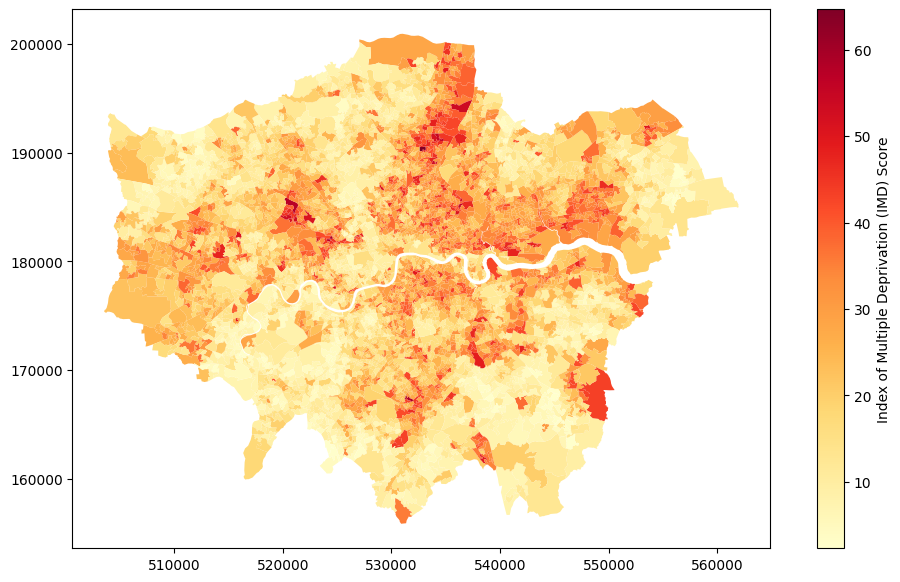

In [156]:
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 7))
gdf_imd.plot(column='Index of Multiple Deprivation (IMD) Score', ax=ax, legend=True,
             legend_kwds={'label': "Index of Multiple Deprivation (IMD) Score",
                          'orientation': "vertical"}, cmap='YlOrRd'
            )

legend = ax.get_legend()

plt.show()

## 1.5 census data

In [157]:
# LSOA CODE need to change 21 to 11
LSOA_21to11 = pd.read_csv('../LSOA_(2011)_to_LSOA_(2021)_to_Local_Authority_District_(2022)_Lookup_for_England_and_Wales_(Version_2).csv')

LSOA_21to11 = LSOA_21to11[["LSOA11CD","LSOA21CD"]]

LSOA_21to11

,LSOA11CD,LSOA21CD
0,E01000001,E01000001
1,E01000002,E01000002
2,E01000003,E01000003
3,E01000005,E01000005
4,E01000006,E01000006
...,...,...
35791,W01001922,W01001922
35792,W01001923,W01001923
35793,W01001924,W01001924
35794,W01001925,W01001925


### population density

In [160]:
# The number of population

# Load the Excel file
excel_file = '../Five year age bands.xlsx'

# Get the list of sheet names
xl = pd.ExcelFile(excel_file)
sheet_names = xl.sheet_names
    
# Read the raw sheet into a DataFrame
residents = pd.read_excel('../Five year age bands.xlsx', sheet_name=sheet_names[-2])

residents = residents[["LSOA code","All usual residents"]]

residents

,LSOA code,All usual residents
0,E01000001,1484
1,E01000002,1382
2,E01000003,1617
3,E01000005,1098
4,E01032739,1613
...,...,...
4989,E01035718,2566
4990,E01035719,1270
4991,E01035720,1226
4992,E01035721,2336


### travel

In [163]:
# The number of population

# Load the Excel file
excel_file = '../Distance traveled to work.xlsx'

# Get the list of sheet names
xl = pd.ExcelFile(excel_file)
sheet_names = xl.sheet_names
    
# Read the raw sheet into a DataFrame
distance = pd.read_excel('../Distance traveled to work.xlsx', sheet_name=sheet_names[-2])

# Creat a new dataset and input the number of people who work from home or work from office，and different commuting distances
distance_data = []

for index, row in distance.iterrows():
    lsoa_code = row['LSOA code']

    distance_5km = row['Less than 2km'] + row['2km to less than 5km']
    distance_5_10km = row['5km to less than 10km'] + row['10km to less than 20km']
    distance_20km = row ['20km to less than 30km'] + row['30km to less than 40km'] + row['40km to less than 60km'] + row['60km and over']
    
    new_row = {'LSOA code': lsoa_code, 'distance_5km' : distance_5km, 'distance_5_10km' : distance_5_10km , 'distance_20km' : distance_20km }
    distance_data.append(new_row)

# Change the list to DataFrame
distance_df = pd.DataFrame(distance_data)

# Check the dataset
distance_df.head()

,LSOA code,distance_5km,distance_5_10km,distance_20km
0,E01000001,137,45,9
1,E01000002,118,27,11
2,E01000003,225,82,10
3,E01000005,173,72,8
4,E01032739,230,62,16


In [164]:
census = pd.merge(residents, distance_df, on = "LSOA code", how='left')

In [165]:
gdf_density = pd.merge(gdf_LSOA, LSOA_21to11, on = "LSOA11CD", how='left')
gdf_density

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry,area,LSOA21CD
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,0,112.9,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181...",1.333208e+05,E01000001
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,0,62.9,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",2.261913e+05,E01000002
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,96,227.7,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182...",5.730297e+04,E01000003
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,0,52.0,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180...",1.907388e+05,E01000005
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,4,116.2,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",1.441958e+05,E01000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,0,107.6,581,2.3,"POLYGON ((544642.68 179824.674, 544766.313 179...",1.233092e+05,E01033742
5012,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,0,20.4,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",1.004853e+06,E01033743
5013,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,117,125.8,646,2.7,"POLYGON ((544536.486 179447.115, 544602.63 179...",1.522620e+05,E01033744
5014,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,0,32.3,591,3.1,"POLYGON ((546415.745 180152.27, 546320.715 180...",5.584777e+05,E01033745


In [166]:
gdf_density2 = pd.merge(gdf_density, census,left_on = "LSOA21CD", right_on= 'LSOA code',how='left')
gdf_density2

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,HHOLDS,AVHHOLDSZ,geometry,area,LSOA21CD,LSOA code,All usual residents,distance_5km,distance_5_10km,distance_20km
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,876,1.7,"POLYGON ((532105.092 182011.23, 532162.491 181...",1.333208e+05,E01000001,E01000001,1484,137,45,9
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,830,1.7,"POLYGON ((532746.813 181786.891, 532671.688 18...",2.261913e+05,E01000002,E01000002,1382,118,27,11
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,817,1.5,"POLYGON ((532135.145 182198.119, 532158.25 182...",5.730297e+04,E01000003,E01000003,1617,225,82,10
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,467,2.1,"POLYGON ((533807.946 180767.77, 533649.063 180...",1.907388e+05,E01000005,E01000005,1098,173,72,8
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,543,3.1,"POLYGON ((545122.049 184314.931, 545271.917 18...",1.441958e+05,E01000006,E01000006,1838,150,268,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,E01033742,Greenwich 007F,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1352,1352,...,581,2.3,"POLYGON ((544642.68 179824.674, 544766.313 179...",1.233092e+05,E01033742,E01033742,1346,79,258,37
5012,E01033743,Greenwich 002H,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,2038,2038,...,663,3.1,"POLYGON ((546579.195 181097.813, 546687.036 18...",1.004853e+06,E01033743,E01033743,1947,135,297,71
5013,E01033744,Greenwich 007G,E02000319,Greenwich 007,E09000011,Greenwich,E12000007,London,1845,1728,...,646,2.7,"POLYGON ((544536.486 179447.115, 544602.63 179...",1.522620e+05,E01033744,E01033744,1805,147,292,40
5014,E01033745,Greenwich 002I,E02000314,Greenwich 002,E09000011,Greenwich,E12000007,London,1820,1820,...,591,3.1,"POLYGON ((546415.745 180152.27, 546320.715 180...",5.584777e+05,E01033745,E01033745,1783,135,251,66


In [167]:
pop_density = gdf_density2[["LSOA11CD","area","All usual residents","distance_5km","distance_5_10km","distance_20km"]]
pop_density["pop_density"] = pop_density["All usual residents"]/(pop_density["area"]/ 1e6)

In [168]:
pop_density = pop_density.drop(columns=["area","All usual residents"])

In [169]:
pop_density

,LSOA11CD,distance_5km,distance_5_10km,distance_20km,pop_density
0,E01000001,137,45,9,11131.048918
1,E01000002,118,27,11,6109.873212
2,E01000003,225,82,10,28218.434367
3,E01000005,173,72,8,5756.564618
4,E01000006,150,268,69,12746.552970
...,...,...,...,...,...
5011,E01033742,79,258,37,10915.650722
5012,E01033743,135,297,71,1937.596674
5013,E01033744,147,292,40,11854.566992
5014,E01033745,135,251,66,3192.607317


# 2 Merge

## 2.1 Merge all df information

In [170]:
# Merge IMD
df_merged_3 = pd.merge(df_merged_2, df_imd_filtered, left_on='lsoa_of_accident_location', right_on='LSOA code (2011)', how='left')
df_merged_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118390 entries, 0 to 118389
Data columns (total 24 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   accident_index                             118390 non-null  object 
 1   casualty_class                             118390 non-null  object 
 2   age_of_casualty                            118390 non-null  float64
 3   casualty_severity                          118390 non-null  int64  
 4   location_easting_osgr                      118390 non-null  float64
 5   location_northing_osgr                     118390 non-null  float64
 6   longitude                                  118390 non-null  float64
 7   latitude                                   118390 non-null  float64
 8   lsoa_of_accident_location                  118390 non-null  object 
 9   accident_severity                          118390 non-null  object 
 10  number_o

In [171]:
# Merge pop_density
df_merged_4 = pd.merge(df_merged_3, pop_density, left_on='lsoa_of_accident_location', right_on='LSOA11CD', how='left')

In [172]:
df_merged_4 = df_merged_4.drop(columns = ["LSOA code (2011)","LSOA11CD"])

In [173]:
df_merged_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131166 entries, 0 to 131165
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   accident_index                             131166 non-null  object 
 1   casualty_class                             131166 non-null  object 
 2   age_of_casualty                            131166 non-null  float64
 3   casualty_severity                          131166 non-null  int64  
 4   location_easting_osgr                      131166 non-null  float64
 5   location_northing_osgr                     131166 non-null  float64
 6   longitude                                  131166 non-null  float64
 7   latitude                                   131166 non-null  float64
 8   lsoa_of_accident_location                  131166 non-null  object 
 9   accident_severity                          131166 non-null  object 
 10  number_o

## 2.2 Spatially connect accident data and bus stops, and calculate how many bus stops there are in the 50m buffer zone

In [174]:
# Create a GeoDataFrame for accident data
gdf_final = gpd.GeoDataFrame(
    df_merged_4,
    geometry=gpd.points_from_xy(df_merged_4.location_easting_osgr, df_merged_4.location_northing_osgr),
    crs="EPSG:27700"  
)

In [176]:
# GeoDataFrame of bus stop, converted to British National Grid
bus_stops_gdf = gpd.read_file('../london_bus_stops.geojson')
bus_stops_gdf = bus_stops_gdf.to_crs("EPSG:27700")

In [177]:
# 50m buffer
gdf_final['buffer'] = gdf_final.geometry.buffer(50)  

# Set the buffer as the active geometry column
gdf_final.set_geometry('buffer', inplace=True)

joined = gpd.sjoin(gdf_final, bus_stops_gdf, how="inner", predicate='intersects')

# Count the number of bus stops near each accident location
bus_stops_count = joined.groupby('accident_index').size()

In [178]:
bus_stops_count

accident_index
2018010080971    4
2018010080973    1
2018010080982    4
2018010080983    8
2018010080992    1
                ..
2022481291915    1
2022481292373    1
2022481292397    2
2022481292425    1
2022481292435    1
Length: 40535, dtype: int64

In [179]:
# merge
bus_stops_count_df = bus_stops_count.reset_index()
bus_stops_count_df.columns = ['accident_index', 'bus_stop_count']

bus_stops_count_df

,accident_index,bus_stop_count
0,2018010080971,4
1,2018010080973,1
2,2018010080982,4
3,2018010080983,8
4,2018010080992,1
...,...,...
40530,2022481291915,1
40531,2022481292373,1
40532,2022481292397,2
40533,2022481292425,1


In [180]:
df_merged_5 = pd.merge(df_merged_4,bus_stops_count_df,on = "accident_index",how = "left")

In [181]:
df_merged_5['bus_stop_count'] = df_merged_5['bus_stop_count'].fillna(0)

df_merged_5

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,urban_or_rural_area,junction_detail,avg_age_of_vehicle,avg_age_of_driver,Index of Multiple Deprivation (IMD) Score,distance_5km,distance_5_10km,distance_20km,pop_density,bus_stop_count
0,2018010080971,Passenger,50.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,...,Urban,not_junction,5.500000,40.000000,15.832,194,63,24,12808.285966,4.0
1,2018010080971,Driver,48.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,...,Urban,not_junction,5.500000,40.000000,15.832,194,63,24,12808.285966,4.0
2,2018010080973,Pedestrian,29.0,0,542020.0,184290.0,0.046471,51.539651,E01003531,Slight,...,Urban,Roundabout,12.023995,38.693432,29.192,219,281,40,10028.302346,1.0
3,2018010080974,Driver,40.0,0,531720.0,182910.0,-0.102474,51.529746,E01002723,Slight,...,Urban,Cross_road,6.668333,30.500000,28.536,198,62,7,15854.305619,0.0
4,2018010080981,Driver,27.0,1,541450.0,183220.0,0.037828,51.530179,E01003492,Serious,...,Urban,Other_junction,4.040000,28.500000,24.941,205,259,51,20977.522762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131161,2022481292382,Driver,62.0,1,531938.0,180948.0,-0.100093,51.512063,E01032739,Serious,...,Urban,not_junction,5.000000,62.000000,13.584,230,62,16,972.567785,0.0
131162,2022481292397,Driver,39.0,1,533151.0,181140.0,-0.082551,51.513504,E01032739,Serious,...,Urban,not_junction,4.429286,43.000000,13.584,230,62,16,972.567785,2.0
131163,2022481292410,Driver,58.0,0,532553.0,180786.0,-0.091297,51.510463,E01032739,Slight,...,Urban,T_junction,6.055000,41.500000,13.584,230,62,16,972.567785,0.0
131164,2022481292425,Pedestrian,26.0,1,533054.0,181236.0,-0.083912,51.514390,E01032739,Serious,...,Urban,T_junction,6.000000,63.000000,13.584,230,62,16,972.567785,1.0


In [182]:
print(gdf_final.crs)
print(bus_stops_gdf.crs)

EPSG:27700
EPSG:27700


In [183]:
print(gdf_final['buffer'].area.head())

0    7841.371226
1    7841.371226
2    7841.371226
3    7841.371226
4    7841.371226
dtype: float64


## 2.3 Spatially connect SHOPS points and LSOA to calculate the density of shop

In [185]:
# Shop's GeoDataFrame, converted to British National Grid
shops_gdf = gpd.read_file('../london_shops_cleaned.geojson')
shops_gdf = shops_gdf.to_crs("EPSG:27700")

Skipping field ways: unsupported OGR type: 1


In [186]:
shops_gdf

,element_type,osmid,amenity,entrance,level,wheelchair,branch,name,shop,addr:city,...,payment:wechat,service:vehicle:transmission,service:vehicle:transmission_repair,bakery,source:date,room,unit,type,company,geometry
0,node,21663357,fuel,None,None,None,BP,bp,yes,None,...,None,None,None,None,NaT,None,None,None,None,POINT (514994.585 187996.733)
1,node,25544124,None,None,None,yes,None,Tesco Express,convenience,London,...,None,None,None,None,NaT,None,None,None,None,POINT (530201.037 180798.619)
2,node,25641515,None,None,None,None,None,None,furniture,None,...,None,None,None,None,NaT,None,None,None,None,POINT (526099.473 185027.457)
3,node,25744394,None,None,None,limited,None,Tesco Express,convenience,London,...,None,None,None,None,NaT,None,None,None,None,POINT (528378.869 186422.445)
4,node,25813308,None,None,None,None,None,Tesco Express,convenience,London,...,None,None,None,None,NaT,None,None,None,None,POINT (529536.562 184589.478)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40429,relation,15273641,None,None,None,None,None,National Tyres and Autocare,car_repair,London,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((537887.969 177237.897, 537901.613 17..."
40430,relation,15395583,None,None,None,None,None,Waitrose,supermarket,London,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((526102.307 191878.837, 526107.114 19..."
40431,relation,15608716,None,None,None,None,None,Next,clothes,None,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((532180.705 181180.929, 532189.684 18..."
40432,relation,16564769,None,None,None,None,None,Le Brixton Deli,deli,None,...,None,None,None,None,NaT,None,None,multipolygon,None,"POLYGON ((531267.169 175414.872, 531274.057 17..."


In [187]:
# Perform the spatial join
joined = gpd.sjoin(gdf_final, shops_gdf, how="inner", predicate='intersects')

# Count the number of shops near each accident location
shops_count = joined.groupby('accident_index').size()

In [188]:
shops_count

accident_index
2018010080971    14
2018010080981    13
2018010080986    28
2018010080992     2
2018010080994     2
                 ..
2022481291936     9
2022481291998     2
2022481292373     2
2022481292425     1
2022481292435     3
Length: 41339, dtype: int64

In [189]:
# merge
shops_count_df = shops_count.reset_index()
shops_count_df.columns = ['accident_index', 'shops_count']

shops_count_df

,accident_index,shops_count
0,2018010080971,14
1,2018010080981,13
2,2018010080986,28
3,2018010080992,2
4,2018010080994,2
...,...,...
41334,2022481291936,9
41335,2022481291998,2
41336,2022481292373,2
41337,2022481292425,1


In [190]:
df_merged_6 = pd.merge(df_merged_5,shops_count_df,on = "accident_index",how = "left")

In [191]:
# Replace NaN values with 0
df_merged_6['shops_count'] = df_merged_6['shops_count'].fillna(0)

df_merged_6

,accident_index,casualty_class,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,accident_severity,...,junction_detail,avg_age_of_vehicle,avg_age_of_driver,Index of Multiple Deprivation (IMD) Score,distance_5km,distance_5_10km,distance_20km,pop_density,bus_stop_count,shops_count
0,2018010080971,Passenger,50.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,...,not_junction,5.500000,40.000000,15.832,194,63,24,12808.285966,4.0,14.0
1,2018010080971,Driver,48.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,Slight,...,not_junction,5.500000,40.000000,15.832,194,63,24,12808.285966,4.0,14.0
2,2018010080973,Pedestrian,29.0,0,542020.0,184290.0,0.046471,51.539651,E01003531,Slight,...,Roundabout,12.023995,38.693432,29.192,219,281,40,10028.302346,1.0,0.0
3,2018010080974,Driver,40.0,0,531720.0,182910.0,-0.102474,51.529746,E01002723,Slight,...,Cross_road,6.668333,30.500000,28.536,198,62,7,15854.305619,0.0,0.0
4,2018010080981,Driver,27.0,1,541450.0,183220.0,0.037828,51.530179,E01003492,Serious,...,Other_junction,4.040000,28.500000,24.941,205,259,51,20977.522762,0.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131161,2022481292382,Driver,62.0,1,531938.0,180948.0,-0.100093,51.512063,E01032739,Serious,...,not_junction,5.000000,62.000000,13.584,230,62,16,972.567785,0.0,0.0
131162,2022481292397,Driver,39.0,1,533151.0,181140.0,-0.082551,51.513504,E01032739,Serious,...,not_junction,4.429286,43.000000,13.584,230,62,16,972.567785,2.0,0.0
131163,2022481292410,Driver,58.0,0,532553.0,180786.0,-0.091297,51.510463,E01032739,Slight,...,T_junction,6.055000,41.500000,13.584,230,62,16,972.567785,0.0,0.0
131164,2022481292425,Pedestrian,26.0,1,533054.0,181236.0,-0.083912,51.514390,E01032739,Serious,...,T_junction,6.000000,63.000000,13.584,230,62,16,972.567785,1.0,1.0


In [192]:
df_merged_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131166 entries, 0 to 131165
Data columns (total 29 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   accident_index                             131166 non-null  object 
 1   casualty_class                             131166 non-null  object 
 2   age_of_casualty                            131166 non-null  float64
 3   casualty_severity                          131166 non-null  int64  
 4   location_easting_osgr                      131166 non-null  float64
 5   location_northing_osgr                     131166 non-null  float64
 6   longitude                                  131166 non-null  float64
 7   latitude                                   131166 non-null  float64
 8   lsoa_of_accident_location                  131166 non-null  object 
 9   accident_severity                          131166 non-null  object 
 10  number_o

In [193]:
df_merged_6.to_csv('london_traffic_accidents_alldata.csv', index=False)

In [194]:
gdf_LSOA1=gdf_LSOA[['LSOA11CD','LAD11NM']]

In [195]:
df_merged_7 = pd.merge(df_merged_6,gdf_LSOA1,left_on = "lsoa_of_accident_location",right_on="LSOA11CD",how = "left")
df_merged_7=df_merged_7.drop(columns = 'LSOA11CD')

In [196]:
df_merged_7['LAD11NM'].unique()

array(['Camden', 'Newham', 'Islington', 'Greenwich', 'Barnet',
       'Kensington and Chelsea', 'Lewisham', 'Brent', 'Tower Hamlets',
       'Hounslow', 'Harrow', 'Southwark', 'Lambeth', 'Ealing',
       'Wandsworth', 'Hackney', 'Haringey', 'Richmond upon Thames',
       'Sutton', 'Enfield', 'Waltham Forest', 'Redbridge',
       'Hammersmith and Fulham', 'Barking and Dagenham', 'Merton',
       'Croydon', 'Hillingdon', 'Havering', 'Bromley', 'Westminster',
       'Bexley', 'Kingston upon Thames', 'City of London'], dtype=object)

In [197]:
df_merged_7.to_csv('london_traffic_accidents_alldata_withborough.csv', index=False)

## 2.4 one-hot encoding for categorical data

In [198]:
df_merged_7.columns

Index(['accident_index', 'casualty_class', 'age_of_casualty',
       'casualty_severity', 'location_easting_osgr', 'location_northing_osgr',
       'longitude', 'latitude', 'lsoa_of_accident_location',
       'accident_severity', 'number_of_vehicles', 'day_of_week',
       'first_road_class', 'speed_limit', 'road_type',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'urban_or_rural_area', 'junction_detail',
       'avg_age_of_vehicle', 'avg_age_of_driver',
       'Index of Multiple Deprivation (IMD) Score', 'distance_5km',
       'distance_5_10km', 'distance_20km', 'pop_density', 'bus_stop_count',
       'shops_count', 'LAD11NM'],
      dtype='object')

In [199]:
# One-Hot Encoding for categorical variables with dropping the first category
categorical_columns = [
    'casualty_class','accident_severity','road_type',
    'day_of_week', 'first_road_class',
    'pedestrian_crossing_physical_facilities', 'light_conditions',
    'weather_conditions', 'urban_or_rural_area','junction_detail'
]

df_final_encoded1 = pd.get_dummies(df_merged_7, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
df_final_encoded1.head()

,accident_index,age_of_casualty,casualty_severity,location_easting_osgr,location_northing_osgr,longitude,latitude,lsoa_of_accident_location,number_of_vehicles,speed_limit,...,pedestrian_crossing_physical_facilities_pedestrian_light_controlled,light_conditions_Night_time_light,light_conditions_Night_time_nolight,weather_conditions_Fog,weather_conditions_Raining/Snowing,urban_or_rural_area_Urban,junction_detail_Other_junction,junction_detail_Roundabout,junction_detail_T_junction,junction_detail_not_junction
0,2018010080971,50.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,2,30.0,...,False,True,False,False,False,True,False,False,False,True
1,2018010080971,48.0,0,529150.0,182270.0,-0.139737,51.524587,E01000854,2,30.0,...,False,True,False,False,False,True,False,False,False,True
2,2018010080973,29.0,0,542020.0,184290.0,0.046471,51.539651,E01003531,1,30.0,...,False,True,False,False,False,True,False,True,False,False
3,2018010080974,40.0,0,531720.0,182910.0,-0.102474,51.529746,E01002723,2,20.0,...,True,True,False,False,False,True,False,False,False,False
4,2018010080981,27.0,1,541450.0,183220.0,0.037828,51.530179,E01003492,2,30.0,...,True,True,False,False,True,True,True,False,False,False


In [200]:
columns_to_convert = [
'casualty_class_Passenger',

       'casualty_class_Pedestrian', 'accident_severity_Serious',
       'accident_severity_Slight', 'road_type_Other', 'road_type_Single',
       'day_of_week_Weekend', 'first_road_class_B_Road', 'first_road_class_C_Road',
       'first_road_class_Motorway', 'first_road_class_Unclassified',
       'pedestrian_crossing_physical_facilities_Others',
       'pedestrian_crossing_physical_facilities_Zebra',
       'pedestrian_crossing_physical_facilities_pedestrian_light_controlled',
       'light_conditions_Night_time_light',
       'light_conditions_Night_time_nolight', 'weather_conditions_Fog',
       'weather_conditions_Raining/Snowing', 'urban_or_rural_area_Urban',
       'junction_detail_Other_junction', 'junction_detail_Roundabout',
       'junction_detail_T_junction', 'junction_detail_not_junction'
]

for col in columns_to_convert:
    df_final_encoded1[col] = df_final_encoded1[col].astype(int)

In [201]:
df_final_encoded1.columns

Index(['accident_index', 'age_of_casualty', 'casualty_severity',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'lsoa_of_accident_location', 'number_of_vehicles',
       'speed_limit', 'avg_age_of_vehicle', 'avg_age_of_driver',
       'Index of Multiple Deprivation (IMD) Score', 'distance_5km',
       'distance_5_10km', 'distance_20km', 'pop_density', 'bus_stop_count',
       'shops_count', 'LAD11NM', 'casualty_class_Passenger',
       'casualty_class_Pedestrian', 'accident_severity_Serious',
       'accident_severity_Slight', 'road_type_Other', 'road_type_Single',
       'day_of_week_Weekend', 'first_road_class_B_Road',
       'first_road_class_C_Road', 'first_road_class_Motorway',
       'first_road_class_Unclassified',
       'pedestrian_crossing_physical_facilities_Others',
       'pedestrian_crossing_physical_facilities_Zebra',
       'pedestrian_crossing_physical_facilities_pedestrian_light_controlled',
       'light_conditions_Night_tim

In [202]:
df_final_encoded1.to_csv('london_traffic_accidents_onehot_withborough.csv', index=False)

# bourough ksi rate

In [203]:
# 1. Count the number of KSI accidents in each borough
ksi_count = df_final_encoded1[df_final_encoded1['casualty_severity'] == 1].groupby('LAD11NM')['casualty_severity'].count()

# 2. Count the total number of accidents in each borough
total_accidents = df_final_encoded1.groupby('LAD11NM')['casualty_severity'].count()

# 3. Calculate the KSI accident rate for each borough
ksi_rate = ksi_count / total_accidents

# Create a new DataFrame to display the results
ksi_rate_df = pd.DataFrame({
    'borough': ksi_rate.index,
    'ksi_rate': ksi_rate.values
})

# Sort the DataFrame by KSI accident rate in descending order
ksi_rate_df_sorted = ksi_rate_df.sort_values(by='ksi_rate', ascending=False).reset_index(drop=True)

ksi_rate_df_sorted


,borough,ksi_rate
0,City of London,0.276923
1,Richmond upon Thames,0.193100
2,Wandsworth,0.176318
3,Westminster,0.172912
4,Islington,0.169281
5,Lambeth,0.168761
6,Hackney,0.166992
7,Merton,0.166248
8,Kensington and Chelsea,0.161505
9,Southwark,0.157468


In [205]:
import geopandas as gpd

# Read the boundary file for London boroughs
london_boroughs = gpd.read_file("../statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
london_boroughs

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.9 181459.8, 549894.6 181465.7..."
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510615.2 191591.3..."
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.8 191689.5, 510660 191690.9, ..."
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201 182512.6, 525181.5 182521.1, ..."
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.9 198355.2, 524594.3 198321.4..."


In [206]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge df with gdf, ensuring they match based on borough names
merged_gdf = london_boroughs.merge(ksi_rate_df_sorted, how='left', left_on='NAME', right_on='borough')


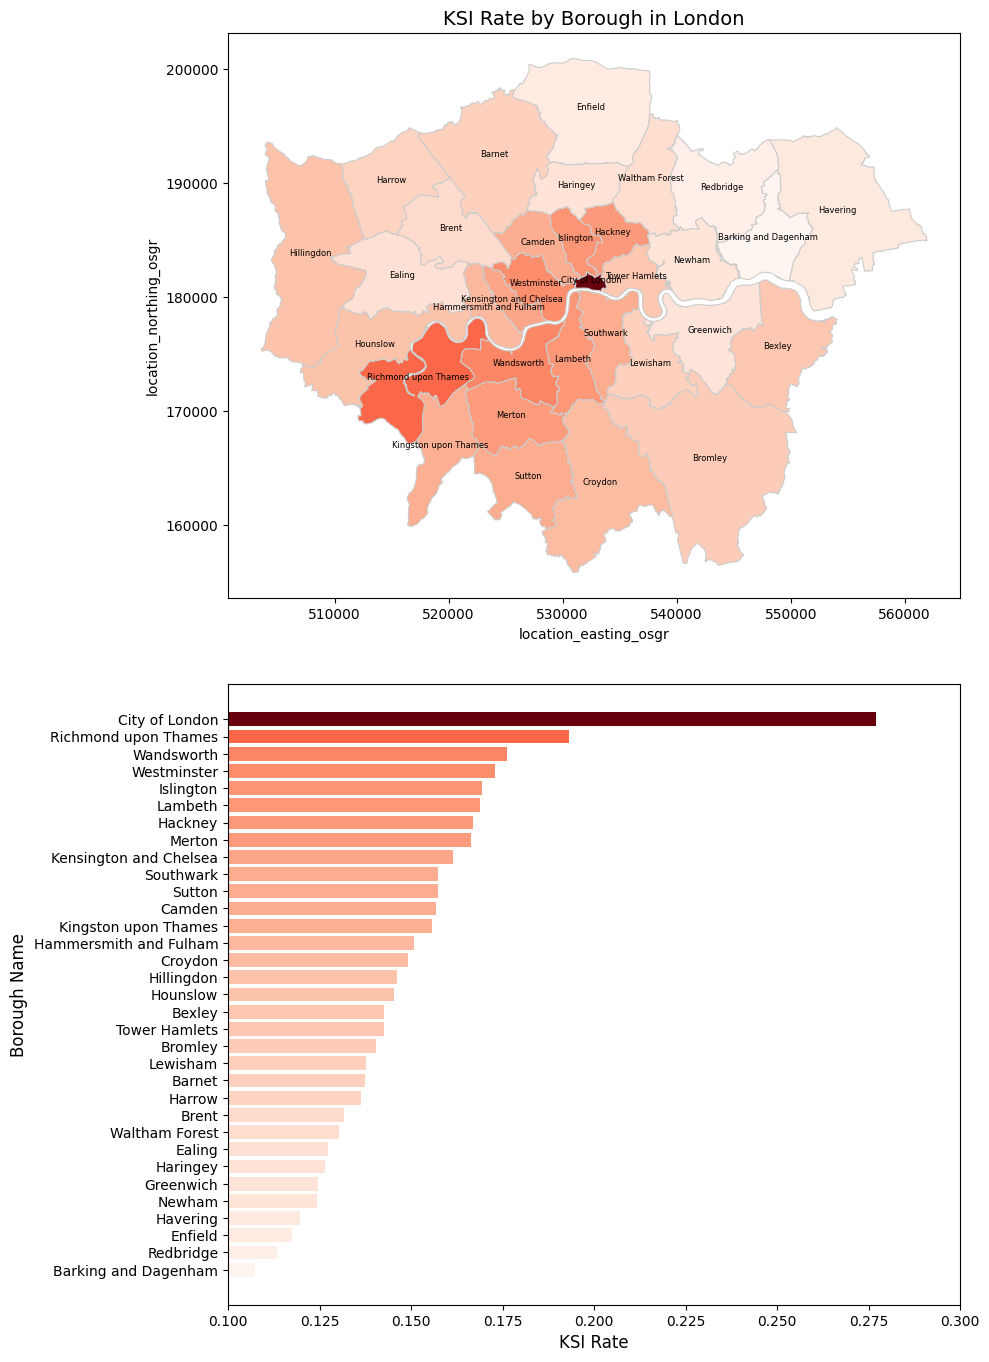

In [208]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
from matplotlib import cm

# Create a color map consistent across the map and bar chart
cmap = cm.get_cmap('Reds')

# Normalize based on the KSI rate
norm = mcolors.Normalize(vmin=merged_gdf['ksi_rate'].min(), vmax=merged_gdf['ksi_rate'].max())

# Set up the canvas with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 14))

# Plot the map on the top subplot
merged_gdf.plot(column='ksi_rate', cmap=cmap, linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=False)
axes[0].set_title('KSI Rate by Borough in London', fontsize=14)
# Add labels for axes
axes[0].set_xlabel('location_easting_osgr')
axes[0].set_ylabel('location_northing_osgr')

# Optionally hide axes
# axes[0].axis('off')

# Annotate each borough's name on the map
for idx, row in merged_gdf.iterrows():
    axes[0].text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['borough'], 
                 horizontalalignment='center', fontsize=6, color='black')

# Plot the bar chart on the bottom subplot with colors consistent with the map
ksi_rate_df_sorted = merged_gdf.sort_values(by='ksi_rate', ascending=False)
colors = [cmap(norm(rate)) for rate in ksi_rate_df_sorted['ksi_rate']]
axes[1].barh(ksi_rate_df_sorted['borough'], ksi_rate_df_sorted['ksi_rate'], color=colors)
axes[1].set_xlabel('KSI Rate', fontsize=12)
axes[1].set_ylabel('Borough Name', fontsize=12)
axes[1].set_xlim(0.1, 0.3)  # Set x-axis to start from 0.1
axes[1].invert_yaxis()  # Invert y-axis for better readability
# Optionally add a title for the bar chart
# axes[1].set_title('KSI Rate by Borough (Bar Chart)', fontsize=14)

plt.tight_layout()

# Save the combined image as PNG
plt.savefig('Output/ksi_rate_combined.png', dpi=300)

# Display the image
plt.show()

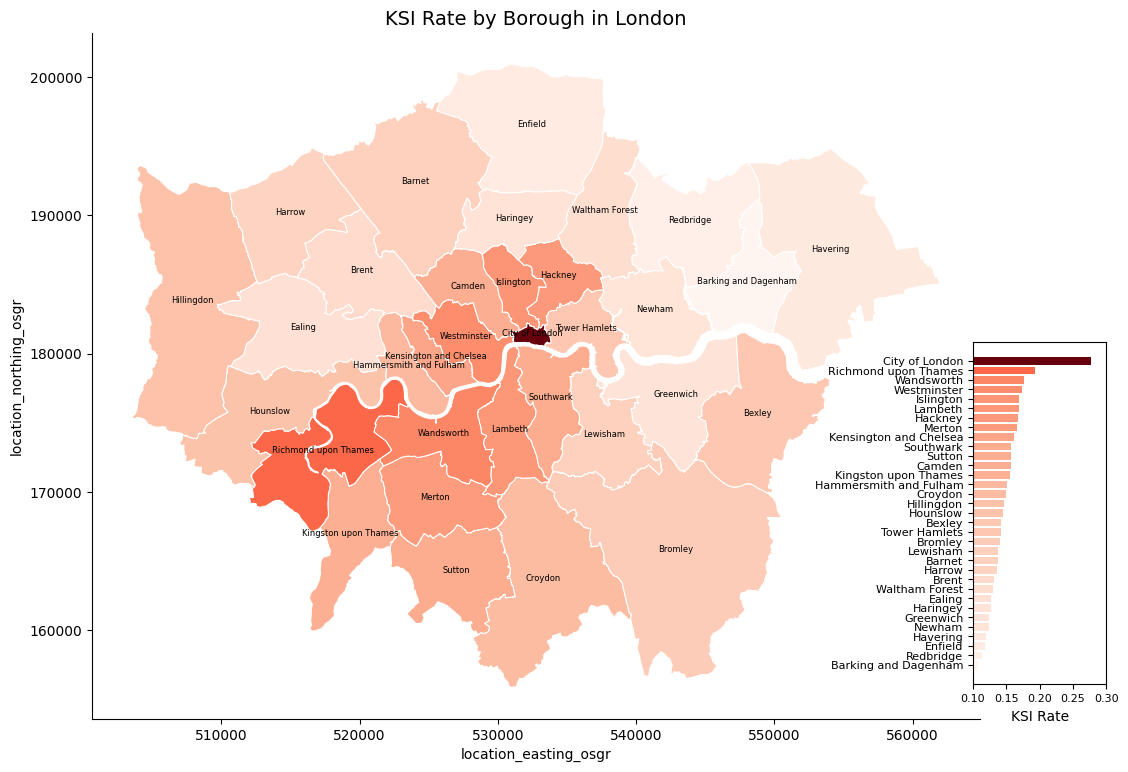

In [262]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create a color map consistent across the map and bar chart
cmap = cm.get_cmap('Reds')

# Normalize based on the KSI rate
norm = mcolors.Normalize(vmin=merged_gdf['ksi_rate'].min(), vmax=merged_gdf['ksi_rate'].max())

# Set up the main canvas
fig, ax = plt.subplots(figsize=(10, 20))

# Plot the map
merged_gdf.plot(column='ksi_rate', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='1', legend=False)
ax.set_title('KSI Rate by Borough in London', fontsize=14)
# Add labels for axes
ax.set_xlabel('location_easting_osgr')
ax.set_ylabel('location_northing_osgr')

# Annotate each borough's name on the map
for idx, row in merged_gdf.iterrows():
    ax.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['borough'], 
            horizontalalignment='center', fontsize=6, color='black')

# Create the inset axis for the bar chart at the bottom right within the main figure
inset_ax = inset_axes(ax, width="30%", height="100%", loc='center right', 
                      bbox_to_anchor=(0.65, 0.05, 0.5, 0.5), bbox_transform=ax.transAxes)

# Sort the data and set up the colors
ksi_rate_df_sorted = merged_gdf.sort_values(by='ksi_rate', ascending=False)
colors = [cmap(norm(rate)) for rate in ksi_rate_df_sorted['ksi_rate']]

# Define a scaling factor for both the bars and x-axis
scaling_factor = 0.5  # This factor controls the degree of shortening for both bars and x-axis

# Plot the bar chart with the original data and scale both the bars and x-axis
inset_ax.barh(ksi_rate_df_sorted['borough'], ksi_rate_df_sorted['ksi_rate'] * scaling_factor, color=colors)

# Adjust the xlim to reflect the scaled x-axis
inset_ax.set_xlim(0.1 * scaling_factor, 0.3 * scaling_factor)

# Adjust xticks and xticklabels to show the original values even though the axis is scaled
original_ticks = [0.1, 0.15, 0.2, 0.25, 0.3]
scaled_ticks = [tick * scaling_factor for tick in original_ticks]
inset_ax.set_xticks(scaled_ticks)
inset_ax.set_xticklabels([f'{tick:.2f}' for tick in original_ticks])

inset_ax.set_xlabel('KSI Rate', fontsize=10)
# inset_ax.set_ylabel('Borough Name', fontsize=10)
inset_ax.invert_yaxis()  # Invert y-axis for better readability
inset_ax.tick_params(axis='both', which='major', labelsize=8)

# Hide only the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Save the combined image as PNG
plt.savefig('Output/ksi_rate_combined_inset_right.png', dpi=300, bbox_inches='tight')

# Display the image
plt.show()
